In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

In [2]:
df_ls0_2 = pd.read_csv('test_teste-by-best_model-ls0.2.csv')
df_ls0_3 = pd.read_csv('test_teste-by-best_model-ls0.3.csv')
df_ls0_35 = pd.read_csv('test_teste-by-best_model-ls0.35.csv')
df_xls = pd.read_csv('test_teste-by-best_model-w2v-xls.csv')
df_xls_ls0_2 = pd.read_csv("test_teste-by-best_model-w2v-xls-ls0.2.csv")
df_xls_gender = pd.read_csv("test_teste-by-best_model-w2v-xls-gender.csv")
df_validacao = pd.read_csv('validacao.csv')

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

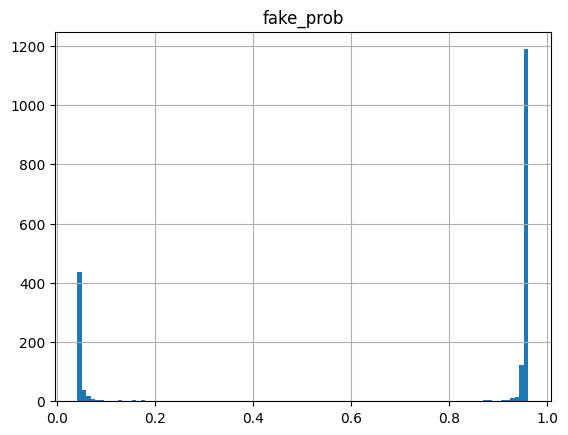

In [3]:
df_model.hist(bins=100)

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

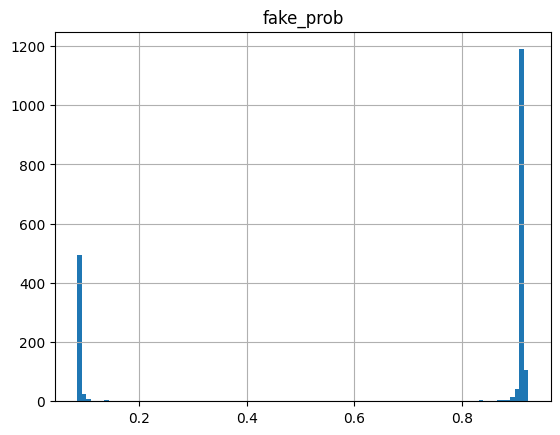

In [4]:
df_ls0_2.hist(bins=100)

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

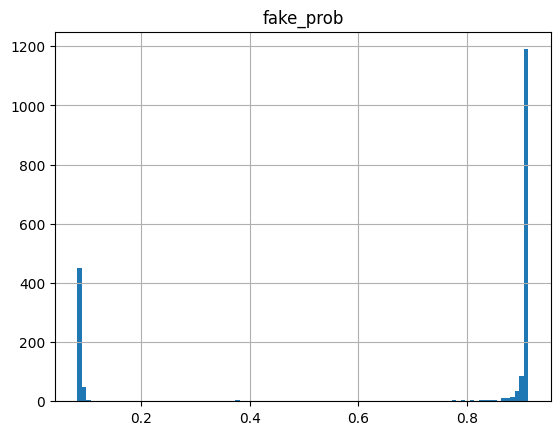

In [5]:
df_ls0_3.hist(bins=100)

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

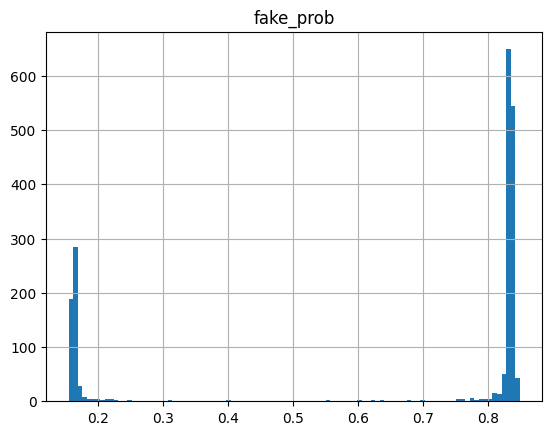

In [6]:
df_ls0_35.hist(bins=100)

array([[<Axes: title={'center': 'label'}>]], dtype=object)

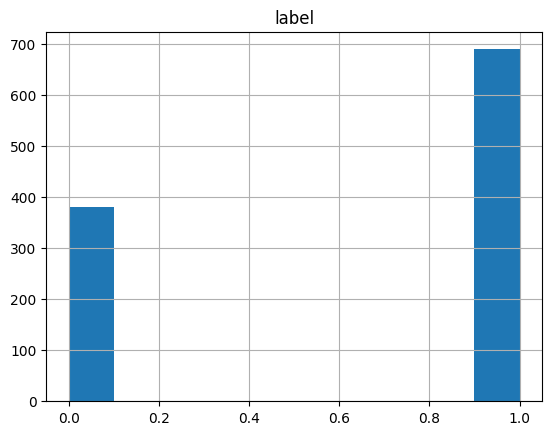

In [10]:
df_validacao.hist()

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

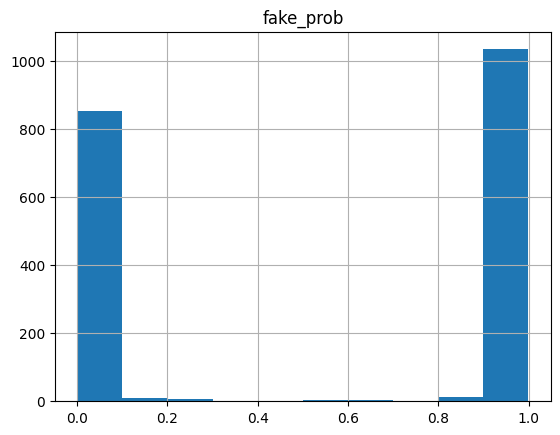

In [7]:
df_xls.hist()

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

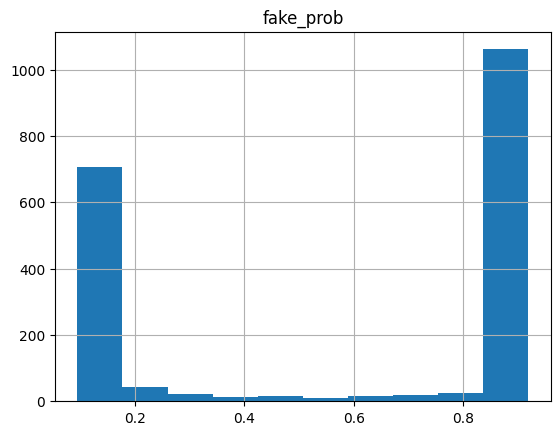

In [8]:
df_xls_ls0_2.hist()

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

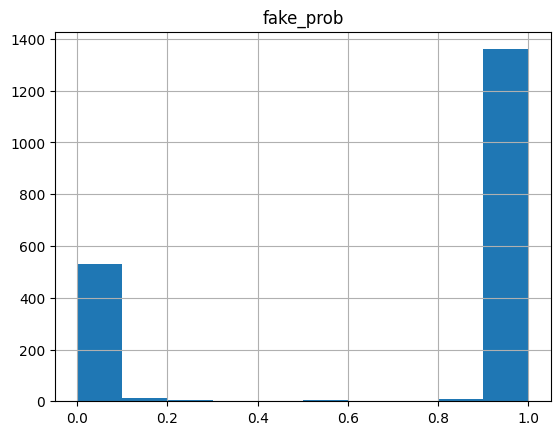

In [6]:
df_temp = pd.read_csv("../NN_Training/test_pretrained_w2v_features_no_ls_extractor_dropout.csv")
df_temp.hist()

array([[<Axes: title={'center': 'fake_prob'}>]], dtype=object)

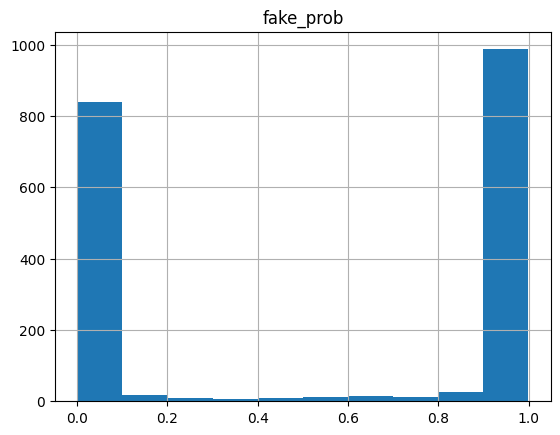

In [3]:
df_xls_gender.hist()

In [11]:
labels = df_validacao['label']
labels

0       1
1       0
2       1
3       1
4       1
       ..
1065    0
1066    1
1067    1
1068    1
1069    0
Name: label, Length: 1070, dtype: int64

 The label smoothing factor to use. Zero means no label smoothing, otherwise the underlying onehot-encoded
            labels are changed from 0s and 1s to 
            
            0 -> label_smoothing_factor/num_labels
            
             1->  1 - label_smoothing_factor + label_smoothing_factor/num_labels

In [62]:
labels_exp = labels[0:2].to_numpy()
labels_exp

array([1, 0])

In [139]:
lsms = np.arange(0.1,1.05,0.1)
lsms

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [140]:
smooths = np.empty((0, len(labels_exp)))

for lsm in lsms:
    smoth_1 = (1-lsm+(lsm/2))
    smoth_0 = (lsm/2)
    sms = np.array([smoth_0,smoth_1])
    smooths = np.vstack((smooths,sms))

In [141]:
smooths

array([[0.05, 0.95],
       [0.1 , 0.9 ],
       [0.15, 0.85],
       [0.2 , 0.8 ],
       [0.25, 0.75],
       [0.3 , 0.7 ],
       [0.35, 0.65],
       [0.4 , 0.6 ],
       [0.45, 0.55],
       [0.5 , 0.5 ]])

In [142]:
smooth_0 = smooths[:,0]
smooth_1 = smooths[:,1]

In [143]:
taxa = smoth_1/smooth_0
taxa_norm = (taxa- np.min(taxa)) / (np.max(taxa)-np.min(taxa))
taxa_norm

array([1.        , 0.44444444, 0.25925926, 0.16666667, 0.11111111,
       0.07407407, 0.04761905, 0.02777778, 0.01234568, 0.        ])

In [144]:
taxa

array([10.        ,  5.        ,  3.33333333,  2.5       ,  2.        ,
        1.66666667,  1.42857143,  1.25      ,  1.11111111,  1.        ])

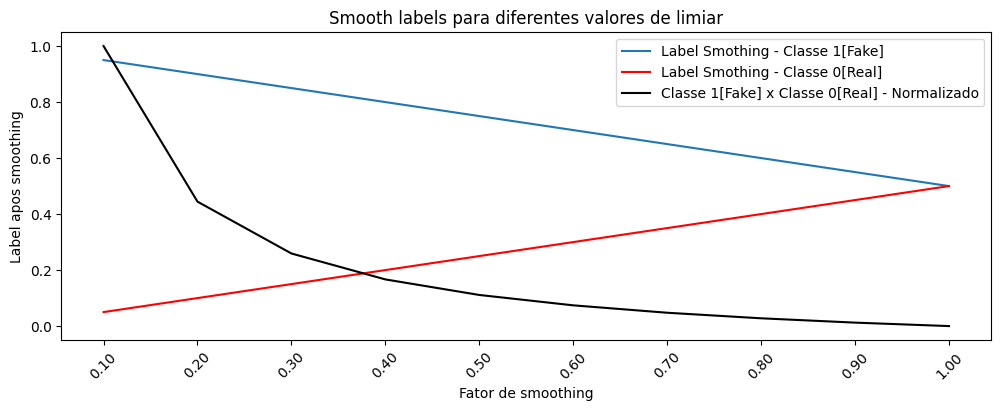

In [148]:
plt.figure(figsize=(12,4))
plt.plot(smooth_1, label='Label Smothing - Classe 1[Fake]')
plt.plot(smooth_0, label='Label Smothing - Classe 0[Real]', c='red')
plt.plot(taxa_norm, label='Classe 1[Fake] x Classe 0[Real] - Normalizado', c='black')

plt.legend()
plt.xticks(range(len(lsms)), ['%.2f' % i for i in lsms], rotation=45)
plt.title("Smooth labels para diferentes valores de limiar")
plt.xlabel('Fator de smoothing')
plt.ylabel("Label apos smoothing")
plt.show()